
# Project: Census Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Data is taken from the FBI's National Instant Criminal Background Check System (NICS). NICS is used to determine whether a potential purchaser is authorized to purchase firearms or explosives. Gun dealers use this system to verify that each customer has no criminal record or is not eligible to purchase. Data were supplemented with state-level data from census.gov.

> Two files are provided, NICS data and US Census Data. The NICS data is in excel format and consists of number of firearm checks by month, state and type. It has about 12485 rows and 52 columns. The US census data is in csv format and consists of state wise statistics for several variables. It has about 84 rows and 52 columns. 

### Question(s) for Analysis

Below are the question based on which I would do the analysis of the data

1. How has the gun purchase trends changed over the years?
2. Is there any trend change in the type of gun checks over the years?
3. What are the top 10 states with most allotted gun permits in 2016?
4. For the year which has the most gun checks does it have any relation with the top 10 states of highest permits allotted? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/Users/kaumudi/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_census = pd.read_csv('census_data.csv')
df_guns = pd.read_excel('gun_data.xlsx')

####  Inspecting Census Data 

In [22]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [23]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [24]:
#viewing number of duplicated values
sum(df_census.duplicated())

3

Since ther are only 3 duplicated values we could just drop them off

In [25]:
#Viewing number of null values in the data
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [26]:
#checking the fact column which has 5 null values
df_census[df_census['Fact'].isnull()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#checking the fact note as it has 57 null values
df_census[df_census['Fact Note'].isnull()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


There are rows from index 65 which have only null vlaues. So we could just drop the rows and the null values should be cleared. Also the Fact Note has no values so we could drop the column as well.

In [28]:
df_census['Fact'].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

We might not require all the facts, based on the analysis we can drop the ones that are not necessary. 

#### Inspecting Guns Data

In [29]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [30]:
sum(df_guns.duplicated())

0

In [31]:
df_guns.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [32]:
df_guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Since the minimum values are zero, we could go deep and check which rows takes the total 0. If there are null values we can just drop them off. 


In [33]:
df_guns.query('totals == 0')

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
406,2017-02,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
516,2016-12,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
956,2016-04,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1231,2015-11,Mariana Islands,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1836,2014-12,Mariana Islands,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12424,1998-12,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12438,1998-11,District of Columbia,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12441,1998-11,Guam,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12451,1998-11,Mariana Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


We can drop all the null values based on above query

In [34]:
df_guns['state'].nunique()

55

In [35]:
df_guns['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

Since we have only 50 states without the union territories in the census table, we could drop off the 5 territories.

## Structure of Data

### Analysis of Census data <code>df_census</code>
- Convert all the data types from string to float as there are all numeric values. 
- Since all the state columns have 20 null values we could just drop all of them. 
- Also there are about 57 null values in the Fact Note column, so we could just drop the column. 
- The three duplicated columns are also null values, so they can be droppped as well. 
- The data present in the Fact is covering various differnt categories and scenarios. To make the merge with guns data easier we could just switch the rows and column. This can also help us drop all the facts that are not required for our analysis and use only the one required.


### Analysis of Guns data <code>df_guns</code>
- Drop all the rows which have totals = 0
- Fill in the null values with mean.
- Drop the territories from state column and have only the 50 states of US
- Convert month from string to datetime format
- Convert multiple and total coulmns data type from int to float


### Data Cleaning
 

#### Cleaning Census Data

In [36]:
df_census.shape

(85, 52)

In [37]:
#Drop Fact Note column
df_census.drop(['Fact Note'], axis = 1, inplace = True)

In [38]:
#Testing if the column is dropped
df_census.shape

(85, 51)

We have dropped the Fact Note column as there are many null values and we also do not require it for our analysis.

In [39]:
#drop duplicated values
df_census.drop_duplicates(inplace = True)

In [40]:
sum(df_census.duplicated())

0

The 3 duplicated values have been dropped.

In [41]:
#drop the null values and verify if any null values are left
df_census.dropna(inplace = True)
df_census.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


All the null values have been dropped. 

In [42]:
#cleaning the data with any special characters
col = list(df_census.columns)
remove_char = [',', '%', '$', '"', 'D', 'Z', 'FN']

for c in col[1:]:
    for char in remove_char:
        df_census[c] = df_census[c].apply(lambda x: x.replace(char, ''))


In [43]:
#Verifying the data
df_census.head(10)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,...,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
3,"Population, Census, April 1, 2010",4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00,7.30,6.30,6.40,6.30,6.10,5.20,5.80,5.50,...,0.071,0.061,7.20,8.30,4.90,6.10,6.20,5.50,5.80,6.50
5,"Persons under 5 years, percent, April 1, 2010",6.40,7.60,7.10,6.80,6.80,6.80,5.70,6.20,5.70,...,0.073,0.064,7.70,9.50,5.10,6.40,6.50,5.60,6.30,7.10
6,"Persons under 18 years, percent, July 1, 2016,...",22.60,25.20,23.50,23.60,23.20,22.80,21.10,21.50,20.10,...,0.246,0.226,26.20,30.20,19.00,22.20,22.40,20.50,22.30,23.70
7,"Persons under 18 years, percent, April 1, 2010",23.70,26.40,25.50,24.40,25.00,24.40,22.90,22.90,21.30,...,0.249,0.236,27.30,31.50,20.70,23.20,23.50,20.90,23.60,24.00
8,"Persons 65 years and over, percent, July 1, 2...",16.10,10.40,16.90,16.30,13.60,13.40,16.10,17.50,19.90,...,0.16,0.157,12.00,10.50,18.10,14.60,14.80,18.80,16.10,15.00
9,"Persons 65 years and over, percent, April 1, 2010",13.80,7.70,13.80,14.40,11.40,10.90,14.20,14.40,17.30,...,0.143,0.134,10.30,9.00,14.60,12.20,12.30,16.00,13.70,12.40


In [44]:
#converting all the 50 state columns to float as the data is numeric
for c in col[1:]:
    df_census[c] = pd.to_numeric(df_census[c])

In [45]:
#verifying the datatypes
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            65 non-null     object 
 1   Alabama         65 non-null     float64
 2   Alaska          64 non-null     float64
 3   Arizona         65 non-null     float64
 4   Arkansas        65 non-null     float64
 5   California      65 non-null     float64
 6   Colorado        65 non-null     float64
 7   Connecticut     65 non-null     float64
 8   Delaware        65 non-null     float64
 9   Florida         65 non-null     float64
 10  Georgia         65 non-null     float64
 11  Hawaii          64 non-null     float64
 12  Idaho           65 non-null     float64
 13  Illinois        65 non-null     float64
 14  Indiana         65 non-null     float64
 15  Iowa            65 non-null     float64
 16  Kansas          65 non-null     float64
 17  Kentucky        65 non-null     float

Since the data had many special characters, first it was cleaned then converted the string datatype to float for better calculations

In [46]:
#interchanging the rows to columns
df_census.set_index('Fact', inplace = True)
df_census_trans = df_census.T
df_census_trans.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,13.8,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,7.7,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,13.8,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,14.4,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,11.4,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0


In [47]:
#reseting the index to find all the facts list
df_census.reset_index('Fact', inplace = True)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,865454.000,6651194.000,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.000,6346298.000,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,...,0.063,0.048,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6,3.9
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.000,6346105.000,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,...,0.071,0.061,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5


In [48]:
facts = df_census['Fact'].unique()
facts = list(facts)
facts

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

In [49]:
#data required for analysis is facts that contain 2016 population estimates
facts_2016 = [s for s in facts if '2016' in s]
facts_2016

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Housing units,  July 1, 2016,  (V2016)',
 'Building pe

In [50]:
df_census_2016 = df_census_trans[['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Housing units,  July 1, 2016,  (V2016)',
 'Building permits, 2016']]
df_census_2016.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300.0,4780131.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185.0,15001.0
Alaska,741894.0,710249.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658.0,1503.0
Arizona,6931071.0,6392301.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003.0,35578.0
Arkansas,2988248.0,2916025.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762.0,9474.0
California,39250017.0,37254522.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525.0,102350.0


Since the guns data have states as columns, we have to transform the census data to a form that is compatible for merging of two tables, for this purpose I have used transpose function to interchange the rows and columns. Later, since I am planning to do analysis on 2016 data. I have decided to drop all the columns that are not required for quicker operations.

#### Cleaning guns Data

In [62]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [63]:
#Convert multiple and total coulmns data type from int to float
df_guns['multiple'] = df_guns['multiple'].astype(float)
df_guns['totals'] = df_guns['totals'].astype(float)

In [64]:
#Convert month from string to datetime format
df_guns['month'] = pd.to_datetime(df_guns['month'])

In [65]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

As the data in the columns multiple and totals is in int, I have converted it to float type for easy calculations. Also, the month data type is in string type, so we need to convert it to datetime for easy extraction of month and year.

In [66]:
df_guns.shape

(12485, 27)

In [67]:
#Drop all the rows which have totals = 0
df_guns_total = df_guns.query('totals == 0')
df_guns = df_guns.drop(df_guns_total.index)
df_guns.shape

(12220, 27)

The data which has totals = 0 has null values in the other columns as well so I just dropped them.

In [68]:
#deleting the territories from the states from the state column
us_state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
gun_state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

del_state = set(gun_state) - set(us_state)

del_state

{'District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands'}

In [72]:
ter_states = df_guns[(df_guns['state'] == 'District of Columbia') | (df_guns['state'] == 'Guam') |
                     (df_guns['state'] == 'Mariana Islands') |
                     (df_guns['state'] == 'Puerto Rico') |
                     (df_guns['state'] == 'Virgin Islands')].index
df_guns.drop(ter_states, inplace = True)
df_guns.shape

(11350, 27)

All the 5 territories have been removed from the dataframe. This has been verified by checking the shape.

In [74]:
#checking the null values
df_guns.isnull().sum()

month                            0
state                            0
permit                           2
permit_recheck               10350
handgun                          0
long_gun                         0
other                         6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
dtype: int64

In [75]:
df_guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,11348.000000,1000.000000,11350.000000,11350.000000,5000.000000,11350.000000,11348.000000,9597.000000,9595.000000,4650.000000,...,1650.000000,900.000000,750.000000,2500.000000,2500.000000,2500.000000,2250.000000,2500.000000,2050.000000,11350.000000
mean,7041.630331,1282.552000,6509.303877,8575.439648,396.052400,295.059471,64.675097,5.301969,8.604482,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,23734.978502
std,24801.129677,9667.124288,8829.284061,9416.217660,1410.425364,816.710594,633.514277,11.321981,17.067140,1.107227,...,4.587865,0.665018,0.703878,74.529346,56.771827,4.673652,1.511227,1.596113,0.446012,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,1327.250000,2778.000000,37.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.000000
50%,814.000000,0.000000,3622.500000,5893.000000,148.000000,151.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14050.000000
75%,5137.750000,1.000000,7987.750000,11021.500000,393.000000,328.750000,0.000000,5.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27537.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [77]:
df_guns.fillna(df_guns.mean(), inplace = True)
df_guns.describe()

/var/folders/sz/pg7kj8dj3m54q676mk_p71kw0000gn/T/ipykernel_65280/157662184.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_guns.fillna(df_guns.mean(), inplace = True)
/var/folders/sz/pg7kj8dj3m54q676mk_p71kw0000gn/T/ipykernel_65280/157662184.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_guns.fillna(df_guns.mean(), inplace = True)


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,...,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000
mean,7041.630331,1282.552000,6509.303877,8575.439648,396.052400,295.059471,64.675097,5.301969,8.604482,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,23734.978502
std,24798.944267,2868.145957,8829.284061,9416.217660,936.079813,816.710594,633.458454,10.410911,15.692127,0.708659,...,1.748808,0.187169,0.180825,34.972899,26.640183,2.193111,0.672737,0.748976,0.189513,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,1282.552000,1327.250000,2778.000000,192.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,6472.000000
50%,814.000000,1282.552000,3622.500000,5893.000000,396.052400,151.000000,0.000000,2.000000,3.000000,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,14050.000000
75%,5141.500000,1282.552000,7987.750000,11021.500000,396.052400,328.750000,0.000000,5.301969,8.604482,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,27537.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [78]:
#testing if there are any null values
df_guns.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

The null values cannot be dropped as there are many null values. So we can replace them by mean. 

In [79]:
#Extracting year from month column

df_guns['year'] = pd.DatetimeIndex(df_guns['month']).year
# df_guns['month'] = pd.DatetimeIndex(df_guns['month']).month
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019.0,2017
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303.0,2017
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394.0,2017
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747.0,2017
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0,2017


In [80]:
#Verifying all the years are correct
df_guns['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

Extracted year from the month column. This can help in visualizing the broader view of the data

<a id='eda'></a>
## Exploratory Data Analysis

1. How has the gun purchase trends changed over the years?
2. Is there any trend change in the type of gun checks over the years?
3. What are the top 10 states with most allotted gun permits over the entire span?
4. For the year which has the most gun checks does it have any relation with the top 10 states of highest permits allotted? 



Below are the functions that might come in handy for the visualizations. For this purpose matplotlib and seaborn has been utilized

In [82]:
#Functions for visualizations 

def bar_plot(data1, data2, color = 'orange'):
    plt.subplots(figsize = (15,10))
    plt.bar(data1, data2, color = color)
    plt.xticks(data1)
    
def set_labels(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
def line_plot(data, ticks = True):
    sns.set(rc={'figure.figsize':(11,8)})
    ax = sns.lineplot(data, dashes = False)
    if ticks == True:
        ax.set_xticks(data.index)

### Research Question 1 How has the gun purchase trends changed over the years.

In [81]:
# grouping the guns purchased with the year and adding the values

df_guns_year = df_guns.groupby('year')['totals'].sum().reset_index()
df_guns_year

,year,totals
0,1998,891376.0
1,1999,9038315.0
2,2000,8421486.0
3,2001,8812457.0
4,2002,8358574.0
5,2003,8393942.0
6,2004,8571726.0
7,2005,8857599.0
8,2006,9982755.0
9,2007,11151998.0


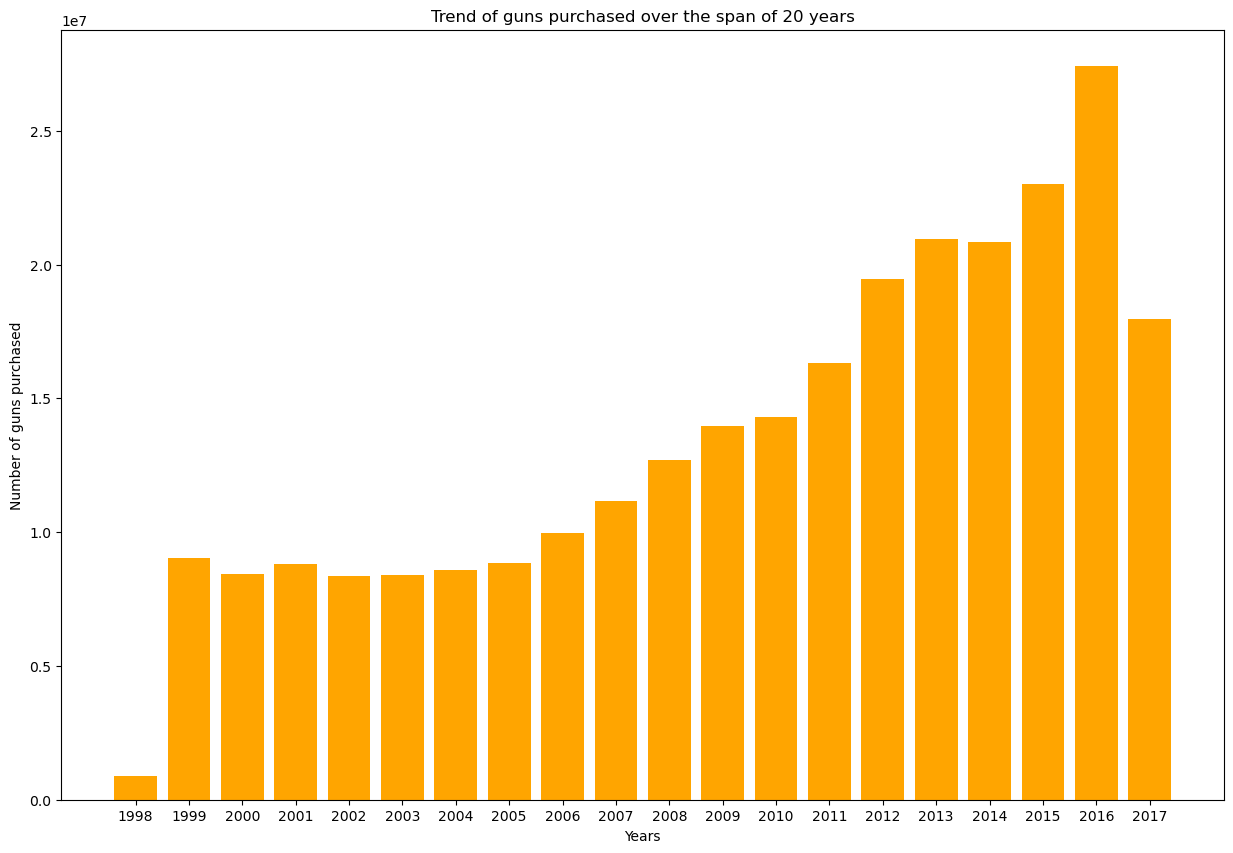

In [83]:
#calling the bar plot and set labels function for plotting th bar chart

bar_plot(df_guns_year['year'], df_guns_year['totals'])
set_labels('Years','Number of guns purchased', 'Trend of guns purchased over the span of 20 years')

From the above bar chart we can observe that over the span of 20 years there has been a relative increase in the guns purchased over the years. There is a sudden spike from 1998 to 1999. This could be for various reasons. It could also be the inconsistencies of the data or maybe less data was gathered. However, we can see that in 2016 there is an increase in the purchase of guns and has been the highest thus far in the data present.

We can do a better analysis if we check which month has done a major contribution or has it been consistent overall.

In [84]:
#grouping months the guns purchased with the year and adding the values
df_guns_month = df_guns.groupby('month')['totals'].sum().reset_index()
df_guns_month

,month,totals
0,1998-11-01,21174.0
1,1998-12-01,870202.0
2,1999-01-01,585569.0
3,1999-02-01,689867.0
4,1999-03-01,741234.0
...,...,...
222,2017-05-01,1896910.0
223,2017-06-01,1886240.0
224,2017-07-01,1731550.0
225,2017-08-01,1894569.0


In [85]:
#targeting only the months of 2016
df_guns_month = df_guns_month.query('month >= "2016-01-01" and month <= "2016-12-01"')
df_guns_month

,month,totals
206,2016-01-01,2538652.0
207,2016-02-01,2603227.0
208,2016-03-01,2507513.0
209,2016-04-01,2134410.0
210,2016-05-01,1859080.0
211,2016-06-01,2121693.0
212,2016-07-01,2185520.0
213,2016-08-01,1835093.0
214,2016-09-01,1981896.0
215,2016-10-01,2324740.0


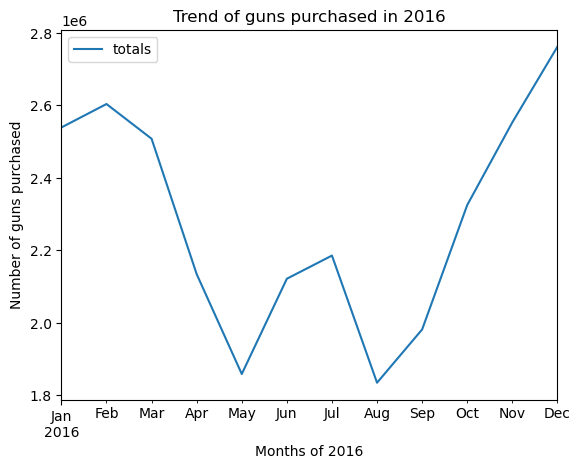

In [86]:
# Visualization of the gun purchased in 2016
df_guns_month.plot(x = 'month', y = 'totals', kind = 'line')
set_labels('Months of 2016','Number of guns purchased', 'Trend of guns purchased in 2016' )



From the above plot we can see that there has been a uphill and downhill over the entire year. It has increased from the months of August to December and from previous plot, we can say that there has been a drop in 2017. 
So, the guns were purchased majorly in last 4 months of 2016. It increased to 2,761,141. 

### Research Question 2 Is there any trend change in the type of gun checks over the years?

In [87]:
# grouping categories of gun with year 

df_guns_groups = df_guns.groupby('year')[['handgun', 'long_gun']].sum()
df_guns_groups

,handgun,long_gun
year,,
1998,219595.0,582682.0
1999,2532511.0,5216320.0
2000,2187581.0,4778762.0
2001,2161166.0,4941982.0
2002,1838239.0,4407866.0
2003,1844597.0,4381438.0
2004,1984064.0,4505326.0
2005,2234171.0,4582776.0
2006,2434038.0,4787683.0


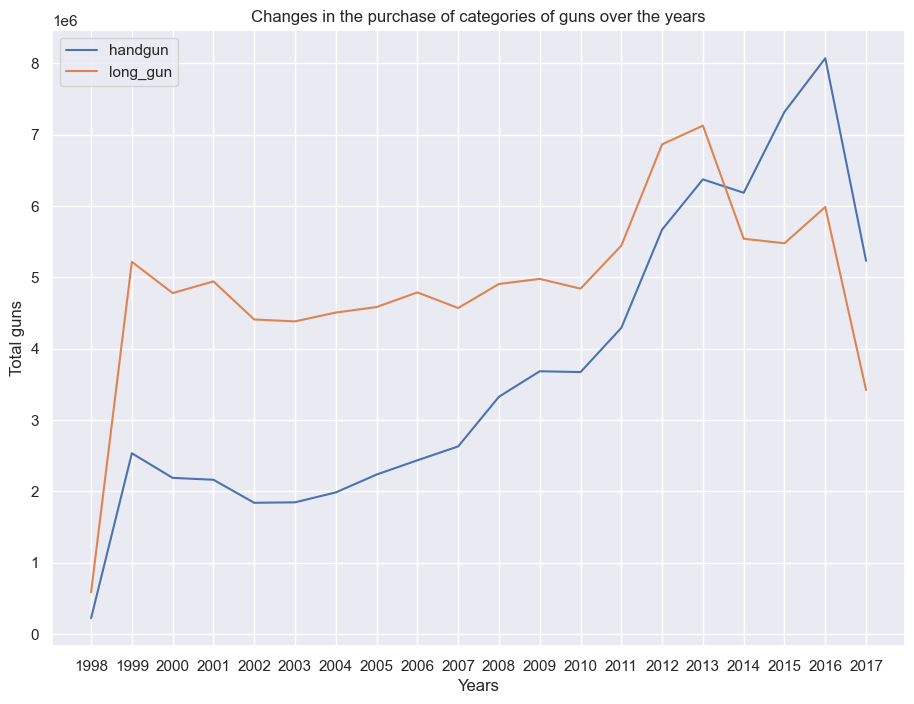

In [88]:
#visualization of categories of guns purchased over the span

line_plot(df_guns_groups)
set_labels('Years', 'Total guns', 'Changes in the purchase of categories of guns over the years')

Although hand guns purchased initially were less than long guns, over the course there is seen to be a sudden increase in between years 2013 to 2016. After which the purchase of hand guns have been more than the long guns until the end of 2017. 

To understand the data better we can do the analysis on the month and year to see how the changes have been going on.

In [89]:
df_guns_groups_month = df_guns.groupby('month')[['handgun', 'long_gun']].sum()
df_guns_groups_month

,handgun,long_gun
month,,
1998-11-01,6858.0,11908.0
1998-12-01,212737.0,570774.0
1999-01-01,184192.0,309818.0
1999-02-01,232172.0,352344.0
1999-03-01,240680.0,376686.0
...,...,...
2017-05-01,550551.0,327885.0
2017-06-01,567630.0,330890.0
2017-07-01,478844.0,322020.0


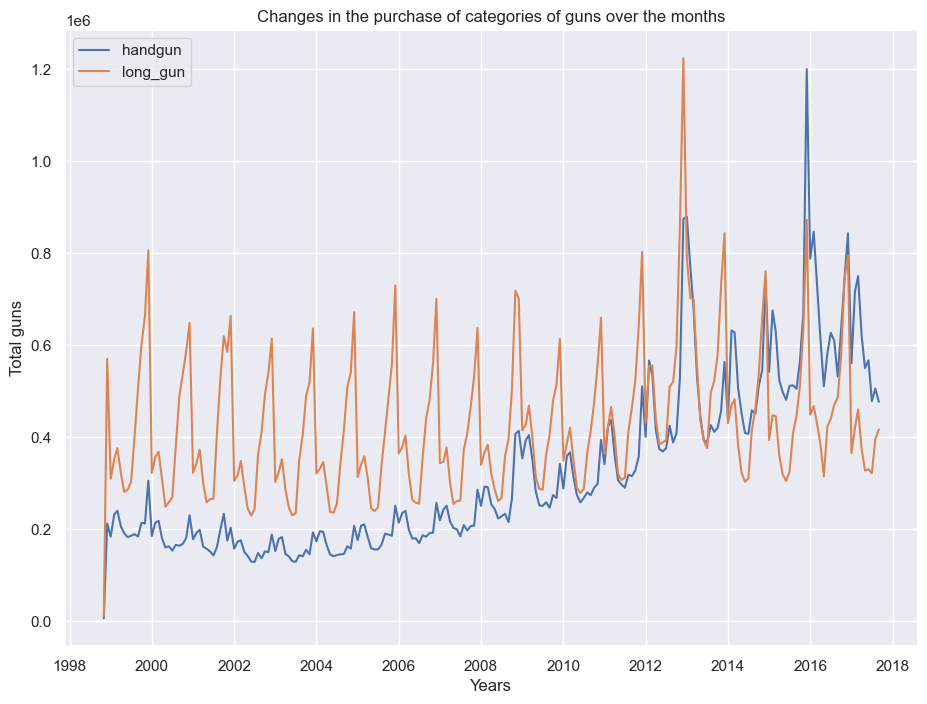

In [90]:
#visualizatin of categories of guns purchased over the entire period
line_plot(df_guns_groups_month, ticks = False)
set_labels('Years', 'Total guns', 'Changes in the purchase of categories of guns over the months')


From the plot we can observe that the long guns were purchased at large in the period of 2013 and the handguns were at peak in 2016. Even from the previous analysis we know that 2016 had a major spike in gun purchases. So we can confidently state that 2016 has been the major year of gun purchases. 

### Research Question 3 What are the top 10 states with most allotted gun permits in 2016?


In [108]:
# grouping states and year with the permits allotted

df_guns_permits = df_guns.groupby(['state', 'year'])['permit'].sum().sort_values(ascending = False).reset_index()
df_guns_permits = df_guns_permits.query('year == 2016')
df_guns_permits

#listing the top 10 states
top_10 = df_guns_permits[:10]
top_10

,state,year,permit
0,Kentucky,2016,3372613.0
11,California,2016,1036981.0
12,Illinois,2016,962930.0
13,Indiana,2016,946912.0
32,Texas,2016,390462.0
37,Minnesota,2016,350315.0
39,North Carolina,2016,345364.0
40,Florida,2016,337086.0
42,Pennsylvania,2016,333755.0
52,Alabama,2016,291039.0


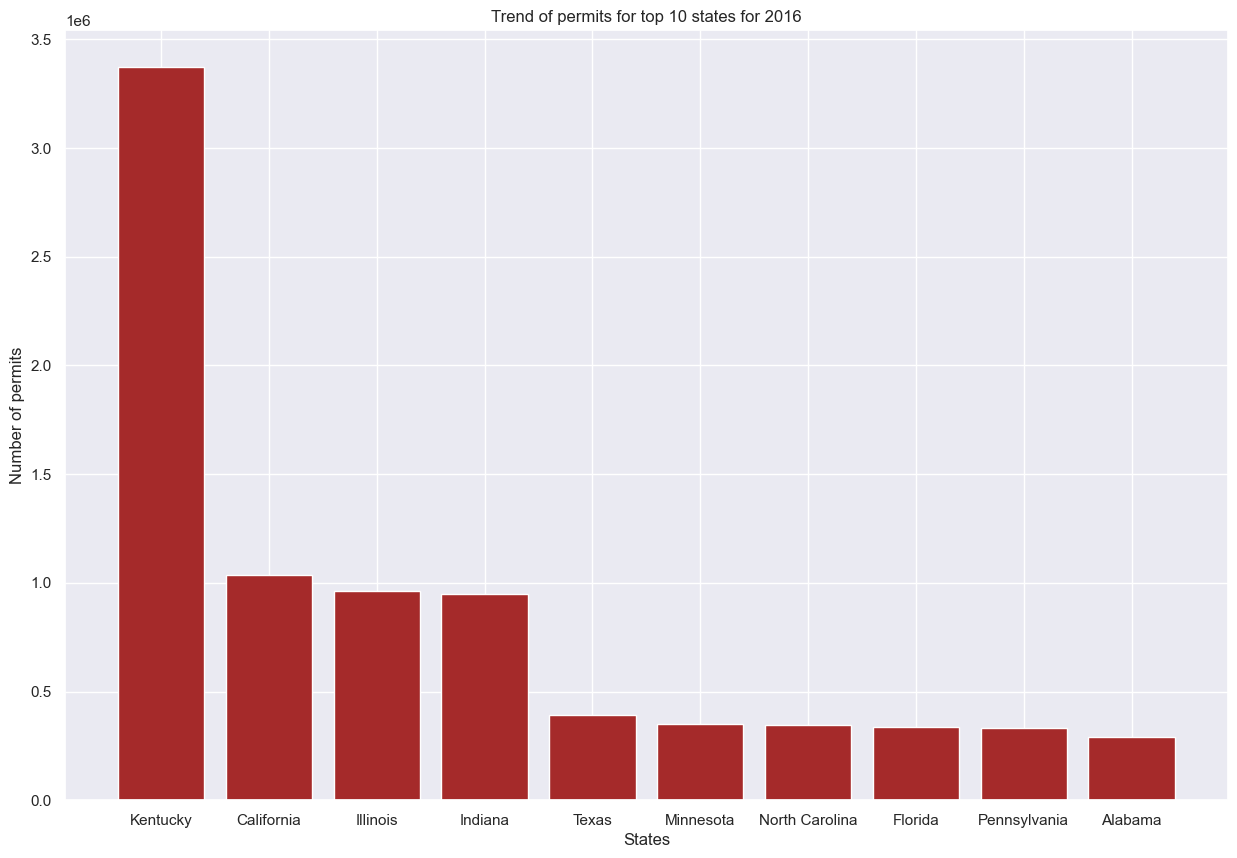

In [110]:
#visualization of the highest permits state

bar_plot(top_10['state'], top_10['permit'], color = 'brown')
set_labels('States', 'Number of permits', 'Trend of permits for top 10 states for 2016')


The plot shows the major states with highest allotted permits. However, the difference in permits between Kentucky and California is vast. There is about 300 percent increase. Even the last state Alabama has about 291,039 permits allotted.

We need to analyze this further with the population of the respective states to understand the data better

### Research Question 4 For the year which has the most gun checks does it have any relation with the top 10 states of highest permits allotted? 

In [111]:
top_10.head(1)

,state,year,permit
0,Kentucky,2016,3372613.0


In [112]:
df_census_2016.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300.0,4780131.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185.0,15001.0


In [113]:
#merging the top 10 dataframe with the 2016 census data
df_guns_2016 = top_10.merge(df_census_2016, left_on='state', right_on=df_census_2016.index, how='inner')
df_guns_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   state                                                                                  10 non-null     object 
 1   year                                                                                   10 non-null     int64  
 2   permit                                                                                 10 non-null     float64
 3   Population estimates, July 1, 2016,  (V2016)                                           10 non-null     float64
 4   Population estimates base, April 1, 2010,  (V2016)                                     10 non-null     float64
 5   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2

In [114]:
#Renaming column 
df_guns_2016.rename(columns={'Population estimates, July 1, 2016,  (V2016)': 'population_2016'}, inplace=True)
df_guns_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   state                                                                                  10 non-null     object 
 1   year                                                                                   10 non-null     int64  
 2   permit                                                                                 10 non-null     float64
 3   population_2016                                                                        10 non-null     float64
 4   Population estimates base, April 1, 2010,  (V2016)                                     10 non-null     float64
 5   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2

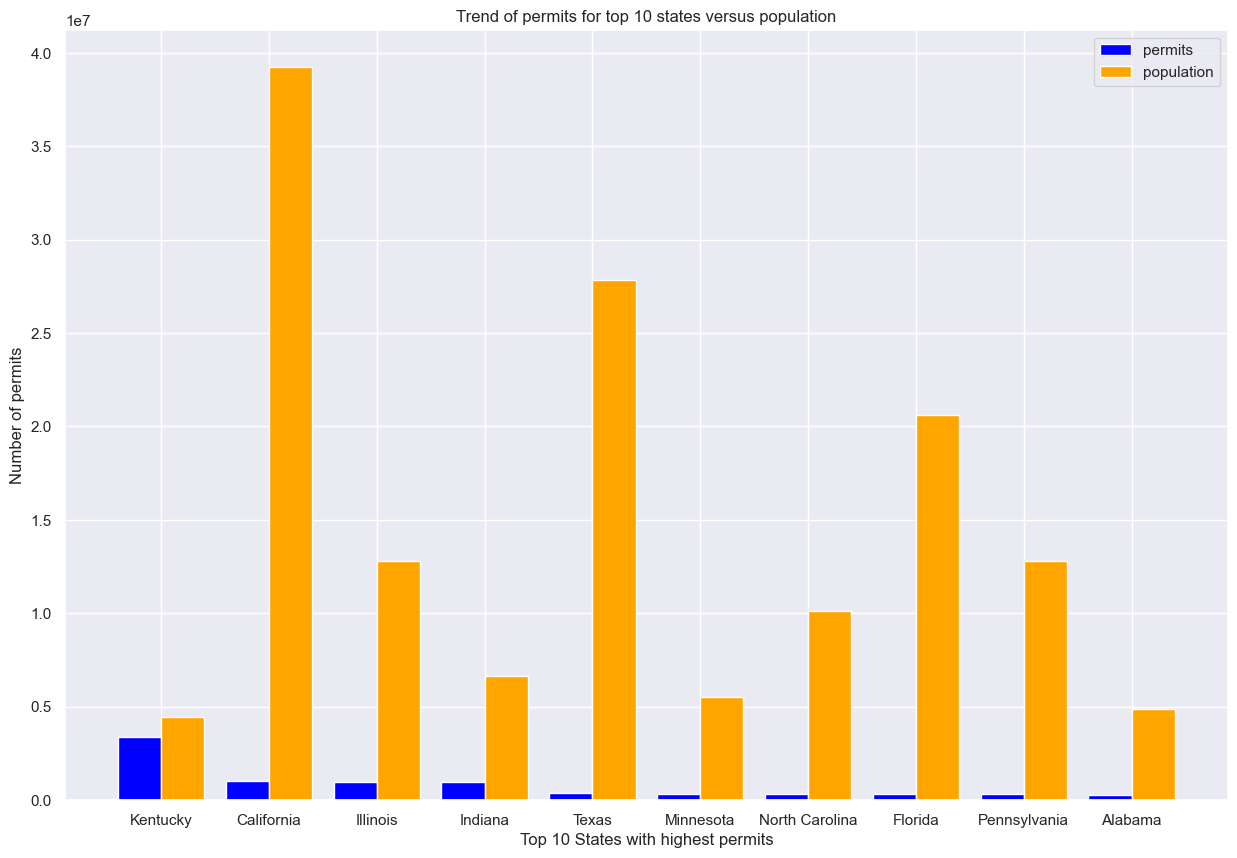

In [115]:
#visualization of permits trend over population
plt.subplots(figsize = (15,10))
x = np.arange(len(df_guns_2016['state'])) 
rects1 = plt.bar(x-0.2, df_guns_2016['permit'], color = 'blue', width = 0.4)
rects2 = plt.bar(x+0.2, df_guns_2016['population_2016'], color = 'orange', width = 0.4)
plt.xticks(x, df_guns_2016['state'])
plt.legend((rects1[0], rects2[0]), ('permits', 'population'))


set_labels('Top 10 States with highest permits','Number of permits', 'Trend of permits for top 10 states versus population' )

The above bar plot shows that Kentucky had higher population as of July 2016 and lower permits permits.But when comparing with other states there is huge difference in gun permits between Kentucky and California. So we can conclude that apparently Kentucky is the state which has the major contribution towards the increase in the gun permits in 2016. 

<a id='conclusions'></a>
## Conclusions

For the given census data and guns data below are the questions that I want to analyze the data on

1. How has the gun purchase trends changed over the years?
2. Is there any trend change in the type of gun checks over the years?
3. What are the top 10 states with most allotted gun permits in 2016?
4. For the year which has the most gun checks does it have any relation with the top 10 states of highest permits allotted? 

Both the datasets had data inconsistencies like null values, duplicated data, data type issues. all these were first fixed and then the analysis was done. 


1. How has the gun purchase trends changed over the years?
This helped in analyzing the years which were involved with major guns purchases. After proper analysis 2016 was the year with largest gun purchase. When I dove deeper, it was clear that last 4 months of the year 2016 was attributed to the major contribution

2. Is there any trend change in the type of gun checks over the years?
Now that we know the year, it would be appropriate to find the gun type that was majorly bought. When analysis was done over the typeof gun purchased over the years. There has been an increase in 2016, but hand gun was highly purchased. This could even mean that people must be buying for either crime or for security. A lot of analysis cannot be done as we do not have the information on the crime rates during that duration. 

    When analyzed further, 2014 was a year with higher long guns purchase, but we did not find anything major during that year from the previous analysis so we can keep that on hold for time being. And we can state that hand guns purchase has been increasing overall and was the major contribution of gun purchase hike in that 2016.

3. What are the top 10 states with most allotted gun permits in 2016?
Further analysis was done on the states that had contributed majorly to the gun purchase in 2016. Overall and in 2016 Kentucky has been the major contributor of gun permits. Having said that, we can also observe that although California is the second top state there is huge difference of guns purchased between Kentucky and California. 

4. For the year which has the most gun checks does it have any relation with the top 10 states of highest permits allotted? 

Although we have the idea of the state which had higher permits. It would be biased to judge just based on the gun permits. We can solve this by projecting the population and gun permits in 2016. This brought a lot of clarity in analysis. Although California has a lot of population, the gun permits were less in comparison to the proportion as well with Kentucky. And in the overall projection we can confidently state that Kentucky was the major contributor in gun permits in 2016. 

**Drawbacks**:

- More research can be done, if there was more information on crime rates in particular states and over the entire span. Since shot guns were purchased, we could have analyzed this further. 


References - 
https://matplotlib.org/stable/api/matplotlib_configuration_api.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [117]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])